In [1]:
import torchvision
import math

import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random as rand
import torch

from sklearn.datasets import make_moons

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
x,y=make_moons(n_samples=2000,shuffle=True,noise=0.5,random_state=42)

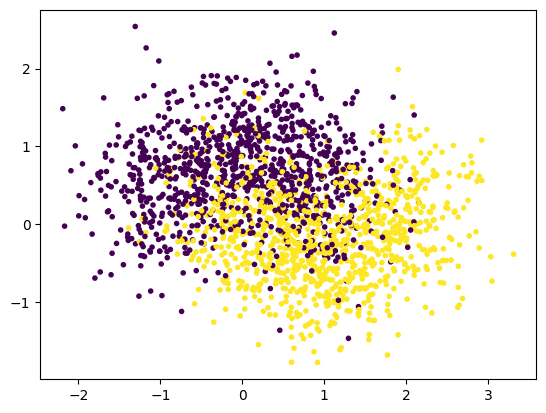

In [4]:
plt.scatter(x[:,0],x[:,1],c=y,marker=".")

In [5]:
x_l=x[0:6]
x_l
y_l=y[0:6]
y_l
x_ul=x[6:2000]
y_ul=y[6:2000]
X_l=torch.tensor(x_l, dtype=torch.float)
Y_l=torch.tensor(y_l, dtype=torch.float)
X_ul=torch.tensor(x_ul, dtype=torch.float)
Y_ul=torch.tensor(y_ul, dtype=torch.float)
x_l=x[0:6]

In [6]:
from torch import nn

class MultiClass_Classsification(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()

        self.layer1 = nn.Linear(in_features=in_features,out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,out_features=hidden_units)
        self.layer4 = nn.Linear(in_features=hidden_units,out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer4((self.relu(self.layer3(self.layer2((self.relu(self.layer1(x))))))))

model_0 = MultiClass_Classsification(in_features=2,out_features=1,hidden_units=8).to(device)
model_0

MultiClass_Classsification(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=8, bias=True)
  (layer4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [7]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.1)

In [8]:
print("Logits:")
print(model_0(X_l).squeeze())
print("Pred probs:")
print(torch.sigmoid(model_0(X_l).squeeze()))
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_l).squeeze())))

Logits:
tensor([0.1273, 0.1159, 0.1186, 0.0526, 0.1275, 0.0724],
       grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5318, 0.5290, 0.5296, 0.5131, 0.5318, 0.5181],
       grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [9]:
!pip -q install torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device)
acc_fn
X_train, y_train = X_l.to(device), Y_l.to(device)
X_test, y_test = X_ul.to(device), Y_ul.to(device)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 6.2 MB/s eta 0:00:00


In [10]:
epochs=1000

X_train, y_train = X_l.to(device), Y_l.to(device)
X_test, y_test = X_ul.to(device), Y_ul.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train.int())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.3f} Acc: {acc:.3f} | Test loss: {test_loss:.3f} Test acc: {test_acc:.3f}")

Epoch: 0 | Loss: 0.671 Acc: 0.667 | Test loss: 0.705 Test acc: 0.505
Epoch: 50 | Loss: 0.000 Acc: 1.000 | Test loss: 19.378 Test acc: 0.756
Epoch: 100 | Loss: 0.000 Acc: 1.000 | Test loss: 20.087 Test acc: 0.756
Epoch: 150 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 200 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 250 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 300 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 350 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 400 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 450 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 500 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 550 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 600 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.756
Epoch: 650 | Loss: 0.000 Acc: 1.000 | Test loss: 20.092 Test acc: 0.

In [11]:
def plot_decision_boundary(model, X, y):

    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),np.linspace(y_min, y_max, 101))

    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))

    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

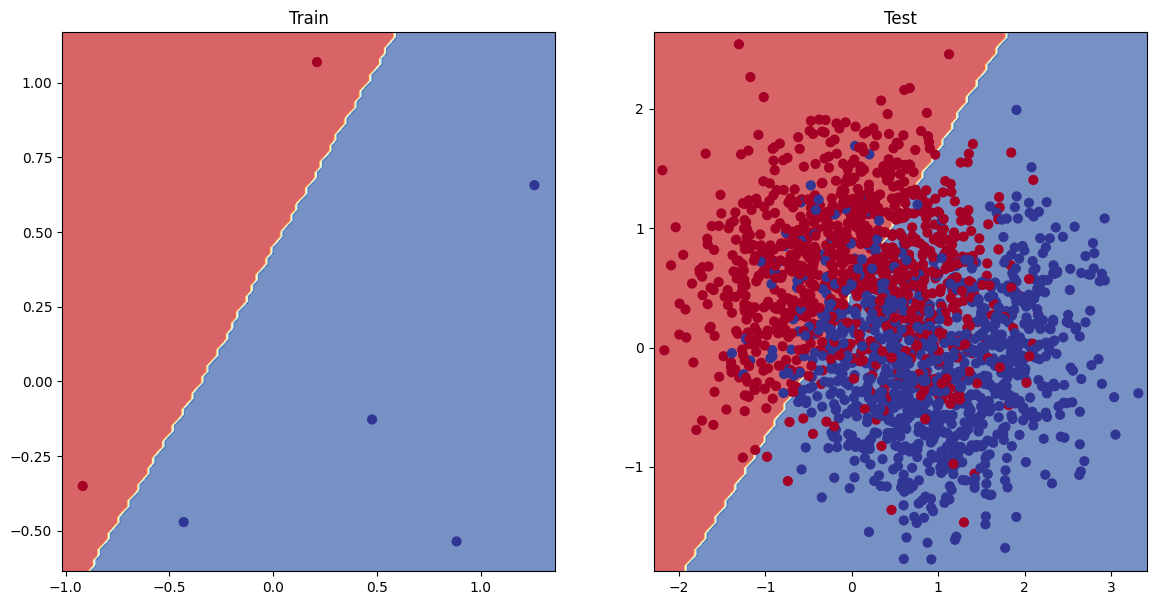

In [12]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [19]:
model_1=MultiClass_Classsification(in_features=2,out_features=1,hidden_units=8).to(device)

loss_fn = nn.CrossEntropyLoss(label_smoothing=0.15)
optimizer2=torch.optim.SGD(params=model_1.parameters(),lr=0.1)
model_1_optim = torch.optim.Adam(params=model_1.parameters(),lr=0.1)
y_l.shape

torch.Size([6])

In [20]:
model_1
x_test,y_test=make_moons(n_samples=10000,shuffle=True,noise=0.5,random_state=42)
x_test=torch.tensor(x_test,dtype=torch.float)
y_test=torch.tensor(y_test,dtype=torch.float)

In [21]:
X_ul.shape
X_l.shape


torch.Size([6, 2])

In [22]:
epochs = 1000

X_l, y_l = X_l.to(device), Y_l.to(device)
X_ul = torch.tensor(x_ul, dtype=torch.float).to(device)
x_test = torch.tensor(x_test, dtype=torch.float).to(device)
y_test = torch.tensor(y_test, dtype=torch.float).to(device)

for epoch in range(epochs):
    model_1.train()

    # Sample from the unlabeled data
    random_sample = np.random.choice(len(X_ul), 32)
    u_x = X_ul[random_sample]

    # Forward pass for the unlabeled data
    unlabelled_logits_1 = model_1(u_x)
    pseudo_labels_1 = torch.round(torch.softmax(unlabelled_logits_1, dim=0))

    loss_1 = loss_fn(unlabelled_logits_1, pseudo_labels_1)


    optimizer2.zero_grad()
    loss_1.backward()
    optimizer2.step()

    # Forward pass for the labeled data
    labelled_logits_2 = model_1(X_l).squeeze()
    labelled_loss_2 = loss_fn(labelled_logits_2, y_l)

    # Forward pass for the unlabeled data again
    unlabelled_logits_2 = model_1(u_x)
    pseudo_labels_2 = torch.round(torch.softmax(unlabelled_logits_2, dim=0))

    loss_2 = loss_fn(unlabelled_logits_2, pseudo_labels_2)

    loss_uda = labelled_loss_2
    delta = (loss_1.detach()) - (loss_2.detach())

    loss_mpl = delta * loss_2
    total_loss = (loss_mpl +  loss_uda)
    train_loss=total_loss

    optimizer2.zero_grad()
    total_loss.backward()
    optimizer2.step()

    model_1.eval()
    with torch.inference_mode():
      y_tlogit=model_1(x_test).squeeze()
      y_tpred = torch.round(torch.sigmoid(y_tlogit))
      test_loss=loss_fn(y_tlogit,y_test)
      test_acc = acc_fn(y_tpred, y_test)

    if epoch % 100 == 0:
      print(f"Train loss: {train_loss}, Test loss: {test_loss}, Test acc: {test_acc}")

<ipython-input-22-5be9e2c1e30a>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float).to(device)
<ipython-input-22-5be9e2c1e30a>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float).to(device)


Train loss: 6.372837543487549, Test loss: 39078.45703125, Test acc: 0.5830000042915344
Train loss: 5.1502766609191895, Test loss: 38323.26171875, Test acc: 0.7903000116348267
Train loss: 5.149592876434326, Test loss: 38348.43359375, Test acc: 0.7889999747276306
Train loss: 5.149502754211426, Test loss: 38351.296875, Test acc: 0.7894999980926514
Train loss: 5.149476528167725, Test loss: 38352.7734375, Test acc: 0.7900999784469604
Train loss: 5.149470806121826, Test loss: 38353.48828125, Test acc: 0.7903000116348267
Train loss: 5.149468898773193, Test loss: 38353.953125, Test acc: 0.7901999950408936
Train loss: 5.149467945098877, Test loss: 38354.1328125, Test acc: 0.7900999784469604
Train loss: 5.149467945098877, Test loss: 38354.234375, Test acc: 0.7901999950408936
Train loss: 5.149468421936035, Test loss: 38354.29296875, Test acc: 0.7901999950408936
